In [46]:
import numpy as np
import scipy

np.random.seed(0)
n = 512
Phi = scipy.fft.dct(np.eye(n), axis=0, norm="ortho")
t = np.linspace(0, 1, n)
p = 16
signal = np.cos(2 * np.pi * 100 * t) + np.cos(2 * np.pi * 900 * t)
gaussian_distributions = []
bernoulli_distributions = []
single_measurement_distributions = []
for i in range(10000):
    gaussian_distributions.append(np.random.rand(p, n))
    bernoulli_distributions.append(np.random.binomial(1, 0.5, size=(p, n)))
    C = np.zeros((p, n))
    C[np.random.randint(p), np.random.randint(n)] = 1
    single_measurement_distributions.append(C)

In [47]:
combined_array = np.concatenate([bernoulli_distributions, gaussian_distributions, single_measurement_distributions], axis=0)

In [48]:
for C in combined_array:
    for i, row in enumerate(C):
        if np.linalg.norm(row) > 0:
            C[i] = row / np.linalg.norm(row)

In [52]:
import numpy as np

import matplotlib.pyplot as plt
def plot_mu(array):
    mu_array = []
    for C in array:
        # Compute incoherence
        mu = np.sqrt(n) * np.max(np.abs(np.dot(C, Phi.T)))
        mu_array.append(mu)

    plt.hist(mu_array, bins=20)
    plt.xlabel('Mu')
    plt.ylabel('Frequency')
    plt.title('Distribution of Mu')
    plt.grid(True)
    plt.show()

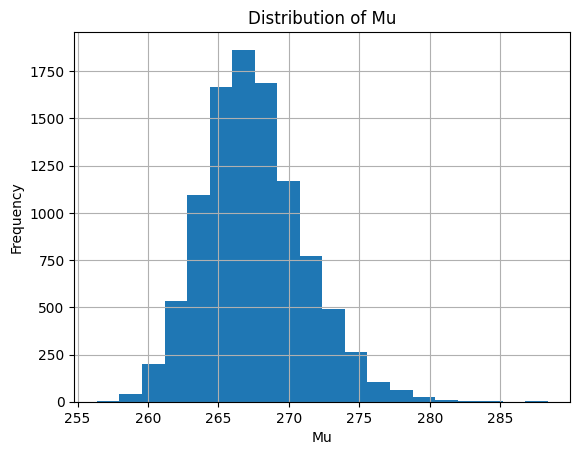

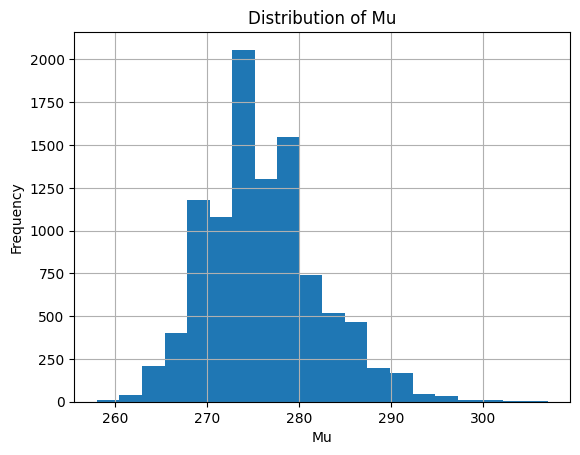

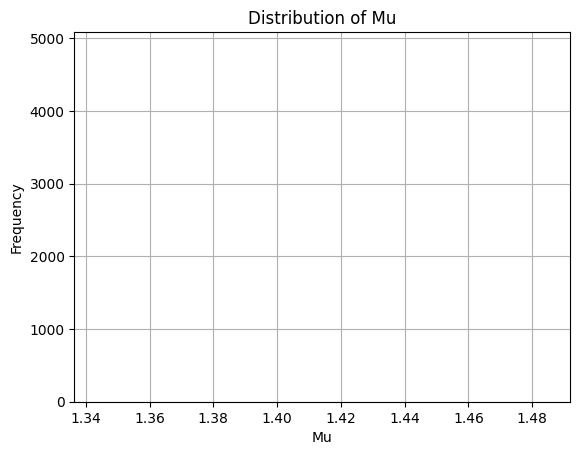

In [53]:
plot_mu(gaussian_distributions)
plot_mu(bernoulli_distributions)
plot_mu(single_measurement_distributions)